# **Sentiment Analysis**

## Import Libraries

In [3]:
!pip install contractions
import pandas as pd
import re
import string
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load dataset

In [4]:
df = pd.read_csv("./IMDB-Dataset.csv")

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

## Processing dataset

In [8]:
stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text) :
    return contractions.fix(text)

def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")  # Removing HTML tags
    text = soup.get_text()
    text = expand_contractions(text)  # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)  # Remove emojis
    text = re.sub(r'\.(?=\S)', '. ', text)  # Add space after full stop
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = "".join([word.lower() for word in text if word not in string.punctuation])  # Lowercase and remove punctuation
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])  # Lemmatize words and remove stopwords
    return text


In [9]:
df['review'] = df['review'].apply(preprocess_text)

<ipython-input-8-a152bbab761c>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")  # Removing HTML tags


## Data analysis

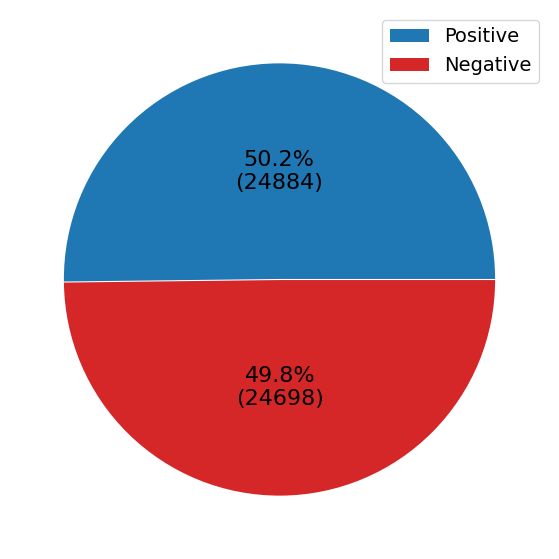

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']

# Create pie chart
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})

labels = [r"Positive", r"Negative"]
plt.legend(labels, loc="best", prop={"size":14})
pie.savefig ("PieChart.png")
plt.show()

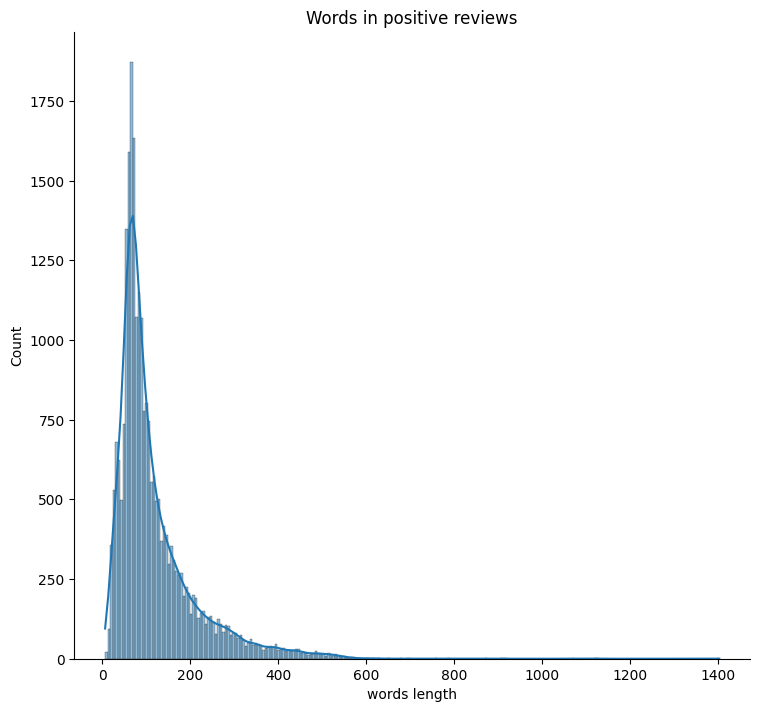

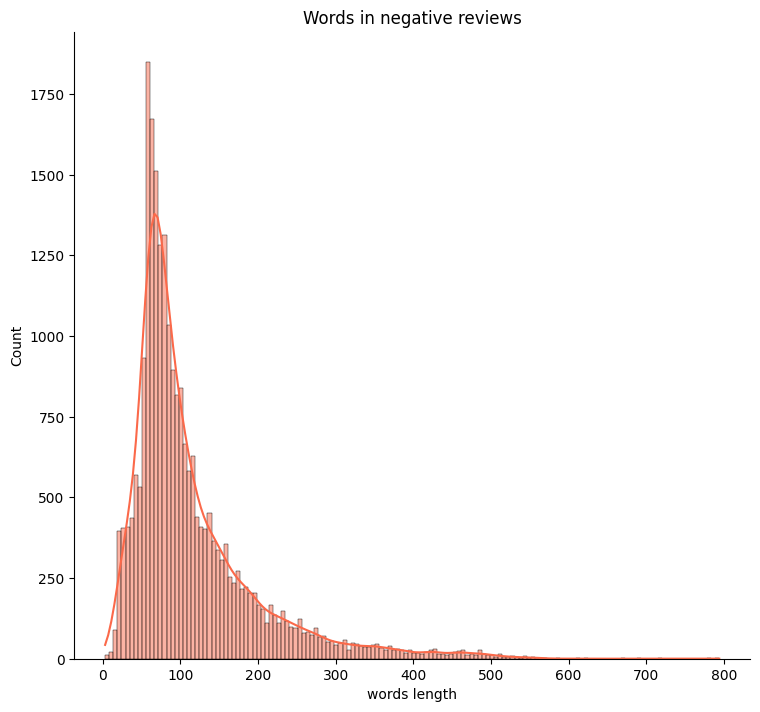

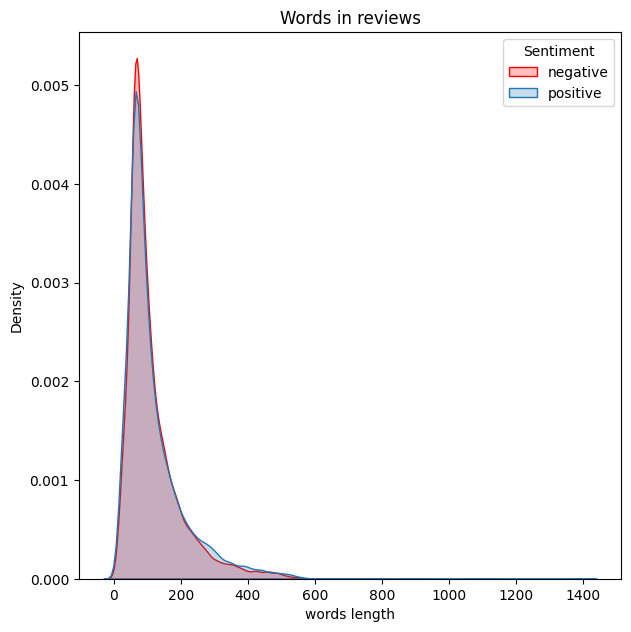

In [13]:
# Calculate the word length for each review
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

# Visualizing words in positive reviews
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

# Visualizing words in negative reviews
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette='Reds'
).set(title='Words in negative reviews')
plt.show(hist_negative)

# Kernel Density Estimation for both positive and negative reviews
plt.figure(figsize=(7,7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)




## Splitting the dataset into training and test sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)


## Converting text into vectors using TF-IDF

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

## Training and evaluating the model

In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7153372995865686

In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)


0.841181809014823

# Multi choice section

In [25]:
print("Question 1: A")
print("Question 2: D")
print("Question 3: A")
print("Question 4: C")
print("Question 5: A")
print("Question 6: A")
print("Question 7: C")
print("Question 8: A")
print("Question 9: C")
print("Question 10: A")

Question 1: A
Question 2: D
Question 3: A
Question 4: C
Question 5: A
Question 6: A
Question 7: C
Question 8: A
Question 9: C
Question 10: A
